In [32]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
from PIL import Image # converting images into arrays
import matplotlib.patches as mpatches # needed for waffle Charts
import folium # to create maps
from pylab import *
%matplotlib inline
import warnings
mpl.style.use('dark_background') #  
warnings.filterwarnings("ignore")

# Downloading Data 

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [33]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

# Exploring Data

view the dataframe

In [34]:
df.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2020-09-06 04:28:33  33.93911   
1   NaN    NaN            NaN        Albania  2020-09-06 04:28:33  41.15330   
2   NaN    NaN            NaN        Algeria  2020-09-06 04:28:33  28.03390   
3   NaN    NaN            NaN        Andorra  2020-09-06 04:28:33  42.50630   
4   NaN    NaN            NaN         Angola  2020-09-06 04:28:33 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      38324    1409      30082   6833.0  Afghanistan   
1  20.168300      10102     312       5976   3814.0      Albania   
2   1.659600      46071    1549      32481  12041.0      Algeria   
3   1.521800       1215      53        928    234.0      Andorra   
4  17.873900       2935     117       1192   1626.0       Angola   

   Incidence_Rate  Case-Fatality_Ratio  
0       98.447555             3.676547  
1      351.032038             3.088497  
2      105.062495             3.362202  
3     1572.510192             4.362140  
4        8.930129             3.986371

dataframe dimensions

In [35]:
print ('dataframe dimensions:', df.shape)

dataframe dimensions: (3954, 14)


# Prepping Data 

In [36]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS                    True
Admin2                  True
Province_State          True
Country_Region         False
Last_Update            False
Lat                     True
Long_                   True
Confirmed              False
Deaths                 False
Recovered              False
Active                  True
Combined_Key           False
Incidence_Rate          True
Case-Fatality_Ratio     True
dtype: bool

In [37]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  188
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [38]:
### Replace NaN values by 0
df.fillna(0, inplace=True)
### Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)
### Rename the columns so that they make sense
df_countries.rename (columns = {'Country_Region':'Country'}, inplace = True)
### Re-order Columns
df_countries = df_countries[['Country','Confirmed','Active','Recovered','Deaths']]
### Group datas by Country
df_countries_grouped=df_countries.groupby('Country').sum()
### Set the country name as index
df_countries.set_index('Country', inplace=True)

In [39]:
# view the final dataframe
df_countries_grouped.head()

Confirmed   Active  Recovered  Deaths
Country                                           
Afghanistan      38324   6833.0      30082    1409
Albania          10102   3814.0       5976     312
Algeria          46071  12041.0      32481    1549
Andorra           1215    234.0        928      53
Angola            2935   1626.0       1192     117

In [40]:
print ('data dimensions:', df_countries_grouped.shape)

data dimensions: (188, 4)


In [41]:
confirmed_sum = df.Confirmed.sum()
active_sum=df.Active.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()

# Visualizing Data

plotting configurations

In [42]:
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)

Creating Dataframe with Totals

In [43]:
df_tot = pd.DataFrame(columns=['Confirmed', 'Active', 'Recovered','Deaths'])
# Append rows in Empty Dataframe by adding dictionaries
df_tot = df_tot.append({'Confirmed': confirmed_sum, 'Active': active_sum, 'Recovered': recovered_sum,'Deaths': death_sum}, ignore_index=True)

# plot Total Cases

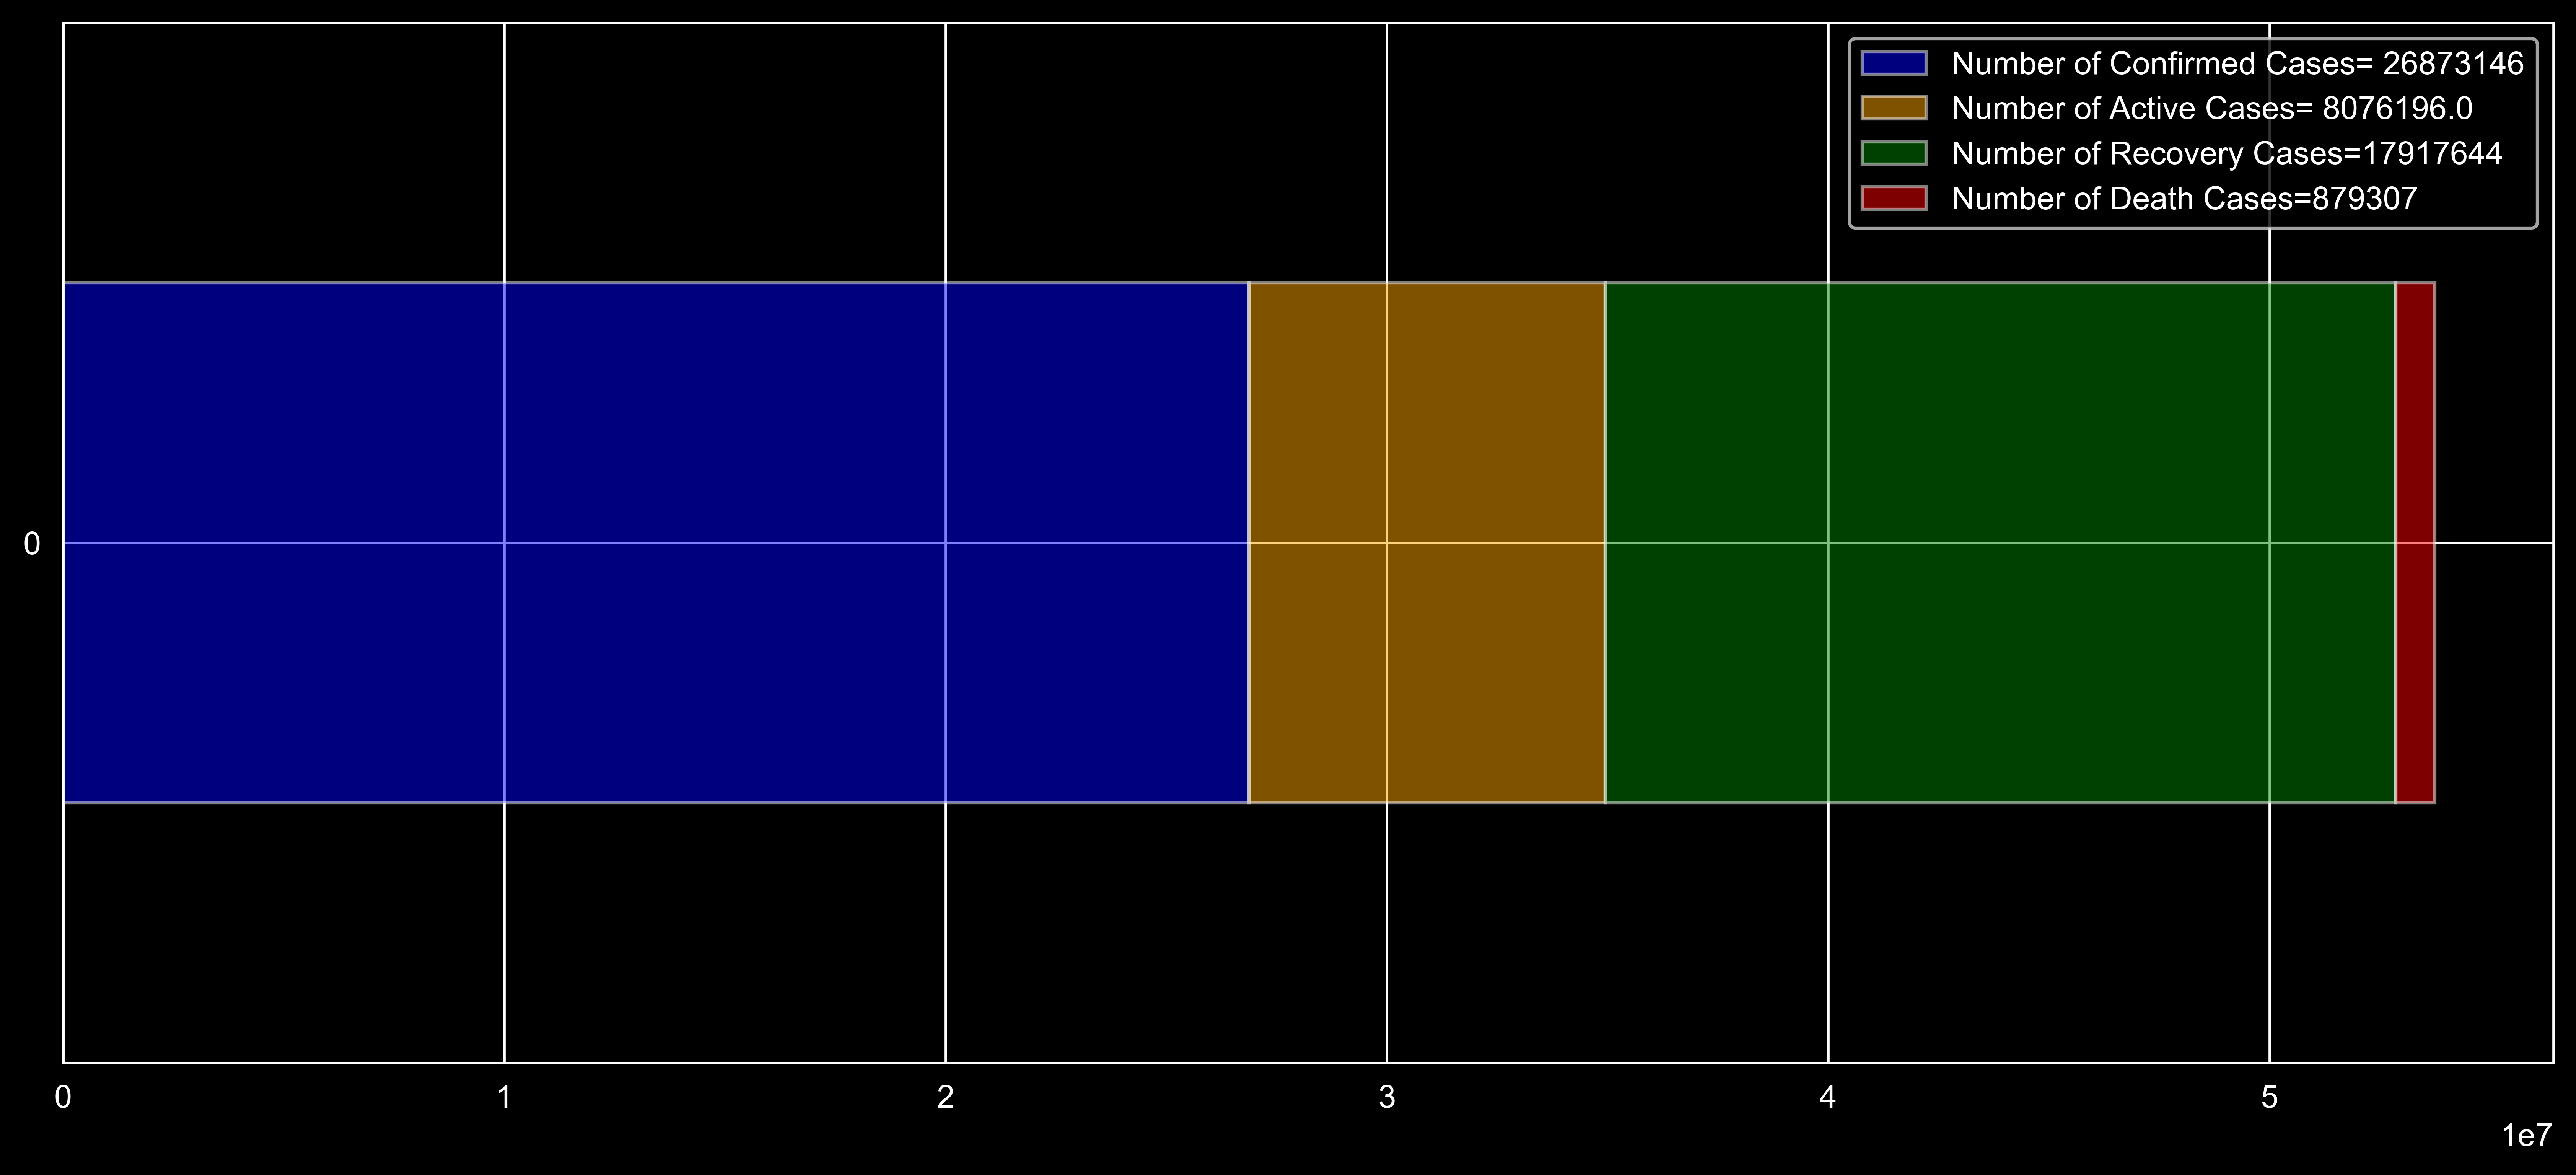

In [44]:
df_tot.plot(kind='barh', figsize=(14, 6),stacked=True, 
             alpha=0.5, 
            color=['blue', 'orange', 'green', 'red']) 
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper right', fontsize=10)
plt.show()

# Treemap charts<a id="6"></a>

visualize hierarchical data using nested rectangles. Click on one sector to zoom in/out, which also displays a pathbar in the upper-left corner of your treemap. To zoom out you can use the path bar as well.


In [45]:
fig = px.treemap(df.sort_values(by='Confirmed', ascending=False ).reset_index(drop=True), 
                 path=["Country_Region"], values="Confirmed", 
                 title='Number of Confirmed Cases',color='Confirmed')
fig.show()

## Countries with most Confirmed cases

In [46]:
df_countries_grouped = df_countries_grouped.sort_values('Confirmed', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

## Countries with most Active cases

In [47]:
df_countries_grouped = df_countries_grouped.sort_values('Active', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

## Countries with most Recovered cases

In [48]:
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

## Countries with most Deaths cases

In [49]:
df_countries_grouped = df_countries_grouped.sort_values('Deaths', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

## Countries with less Deaths cases

In [50]:
df_countries_grouped = df_countries_grouped.sort_values(['Deaths','Recovered','Confirmed'], ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

## Countries with less Recovered cases

In [51]:
df_countries_grouped = df_countries_grouped.sort_values(['Recovered','Deaths'], ascending=True)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

# Unstacked Histogram

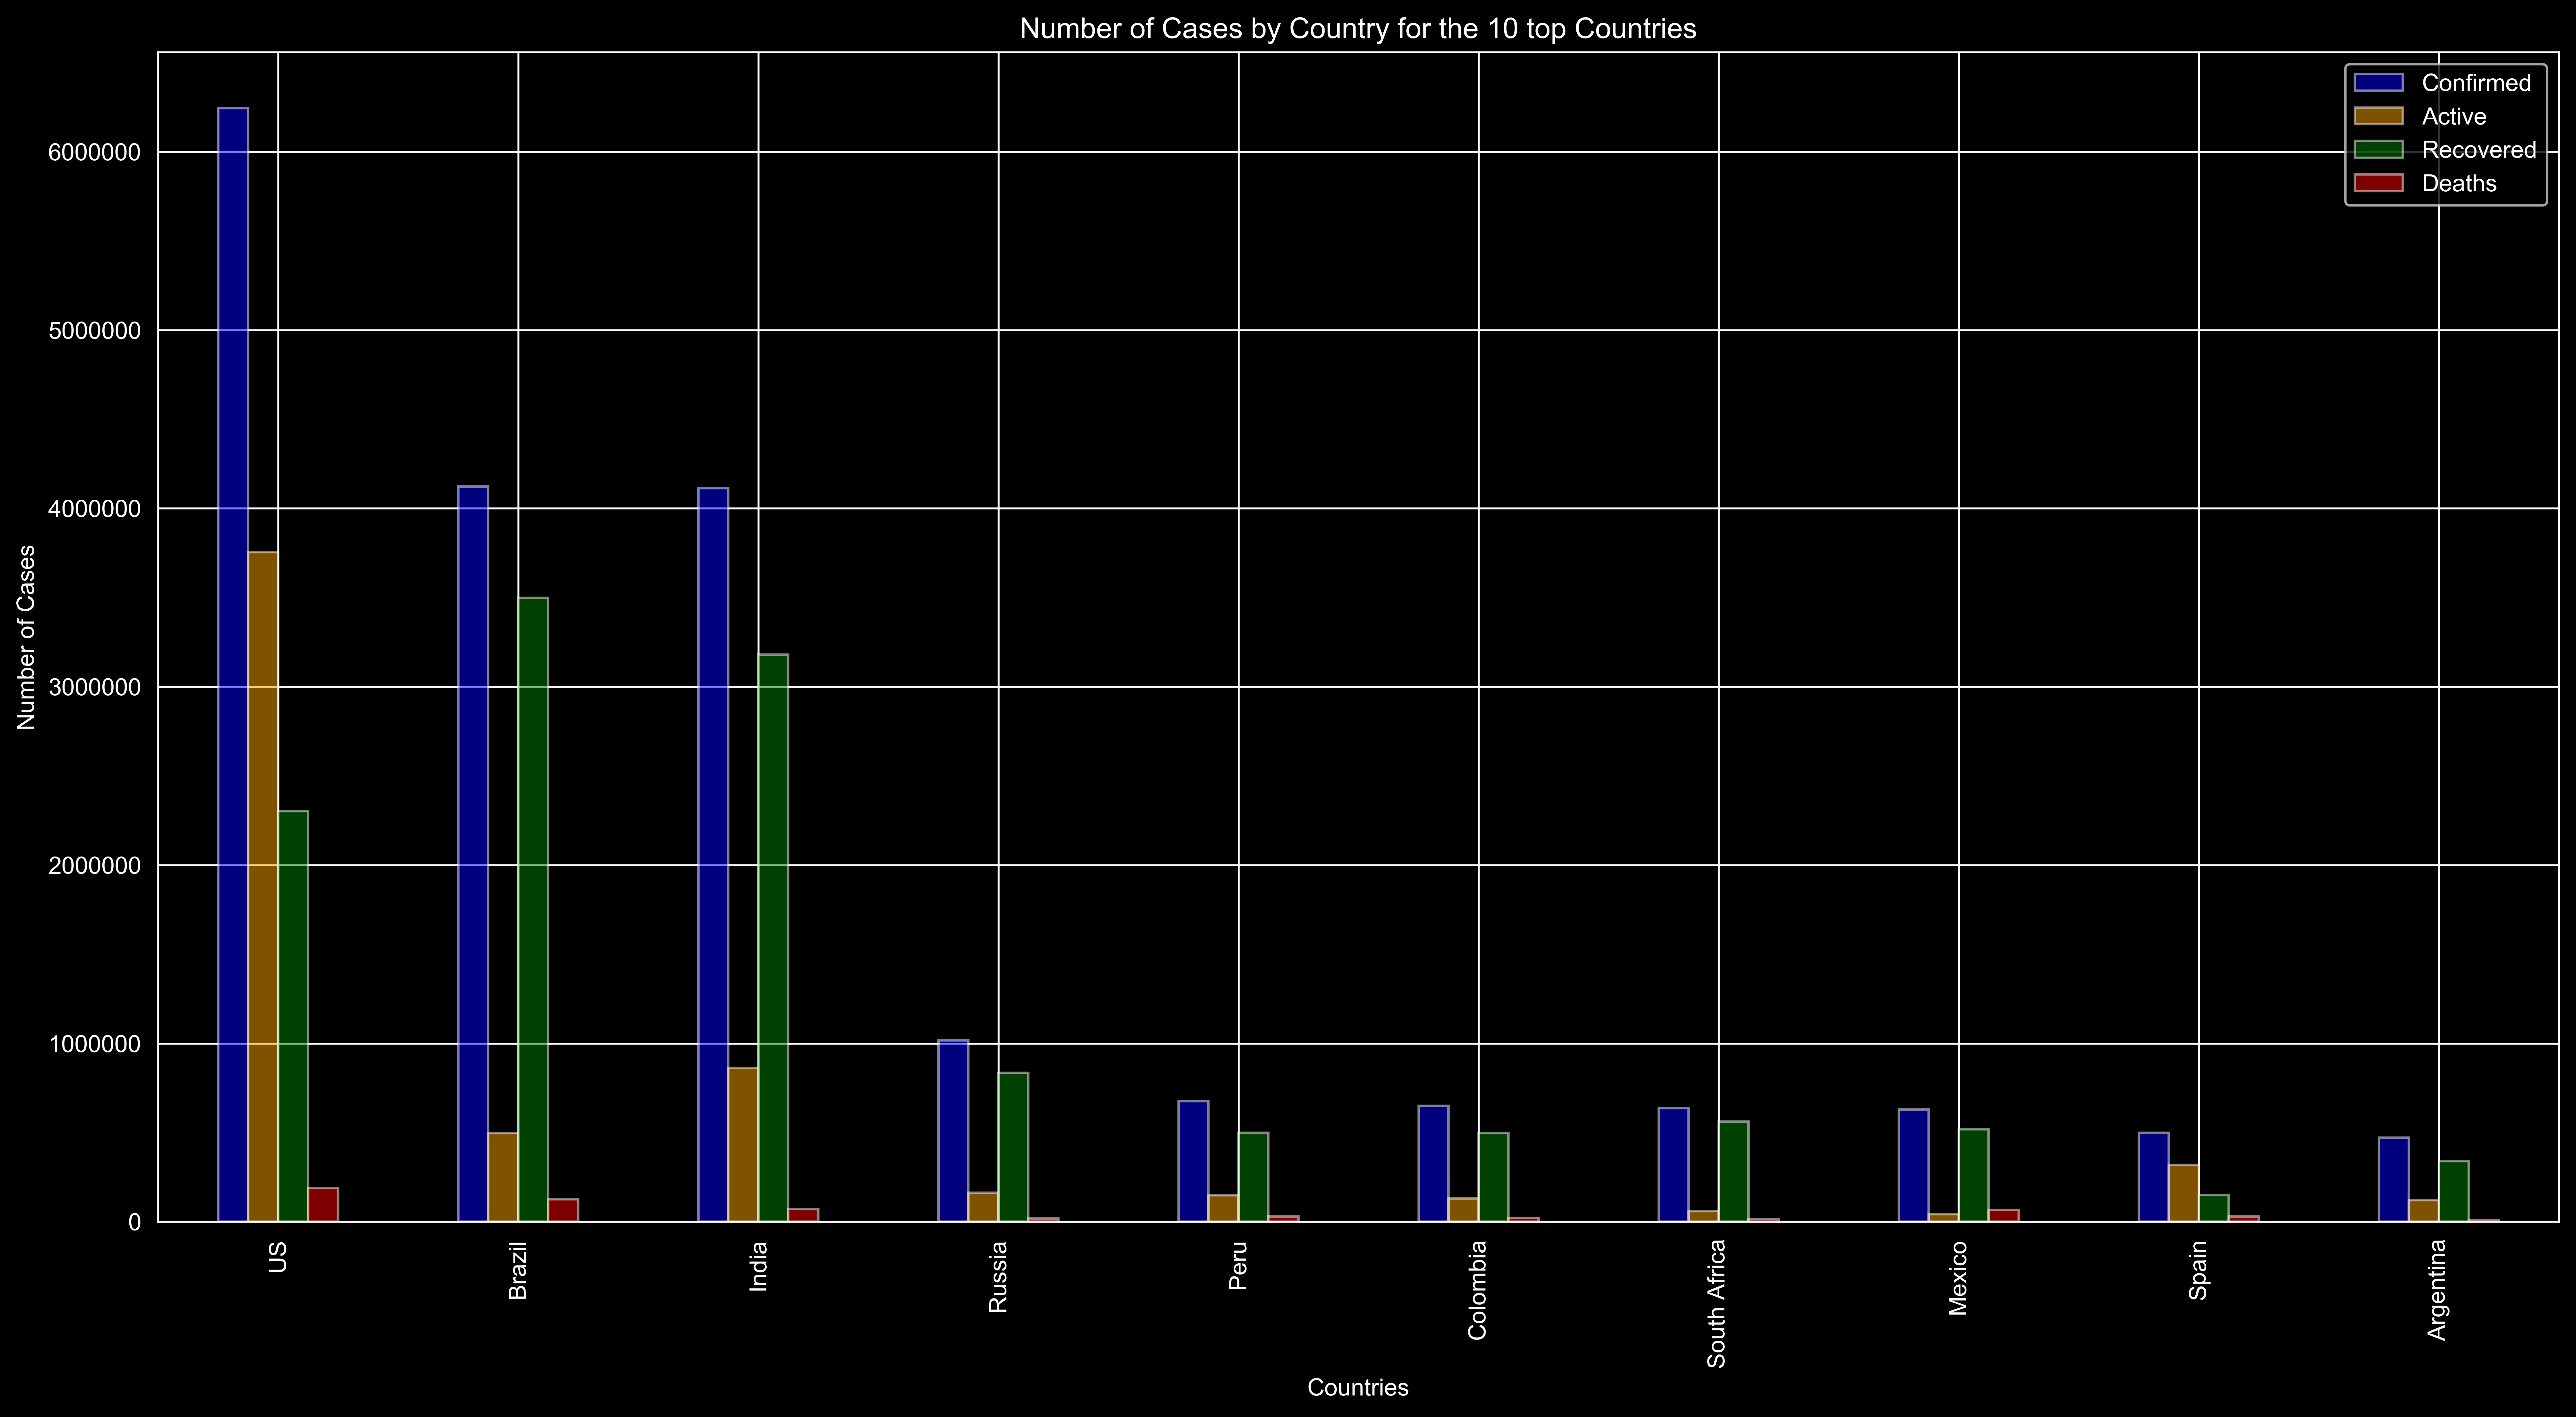

In [52]:
### Sort the top countries by Confirmed cases
df_countries_grouped.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top entries
df_countries_top = df_countries_grouped.head(10)
### Show Unstacked Histogram
df_countries_top.plot(kind='bar', figsize=(18, 9), stacked=False, 
             alpha=0.5,
            color=['blue', 'orange', 'green', 'red'])
plt.title('Number of Cases by Country for the 10 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.show()

# Box Plot

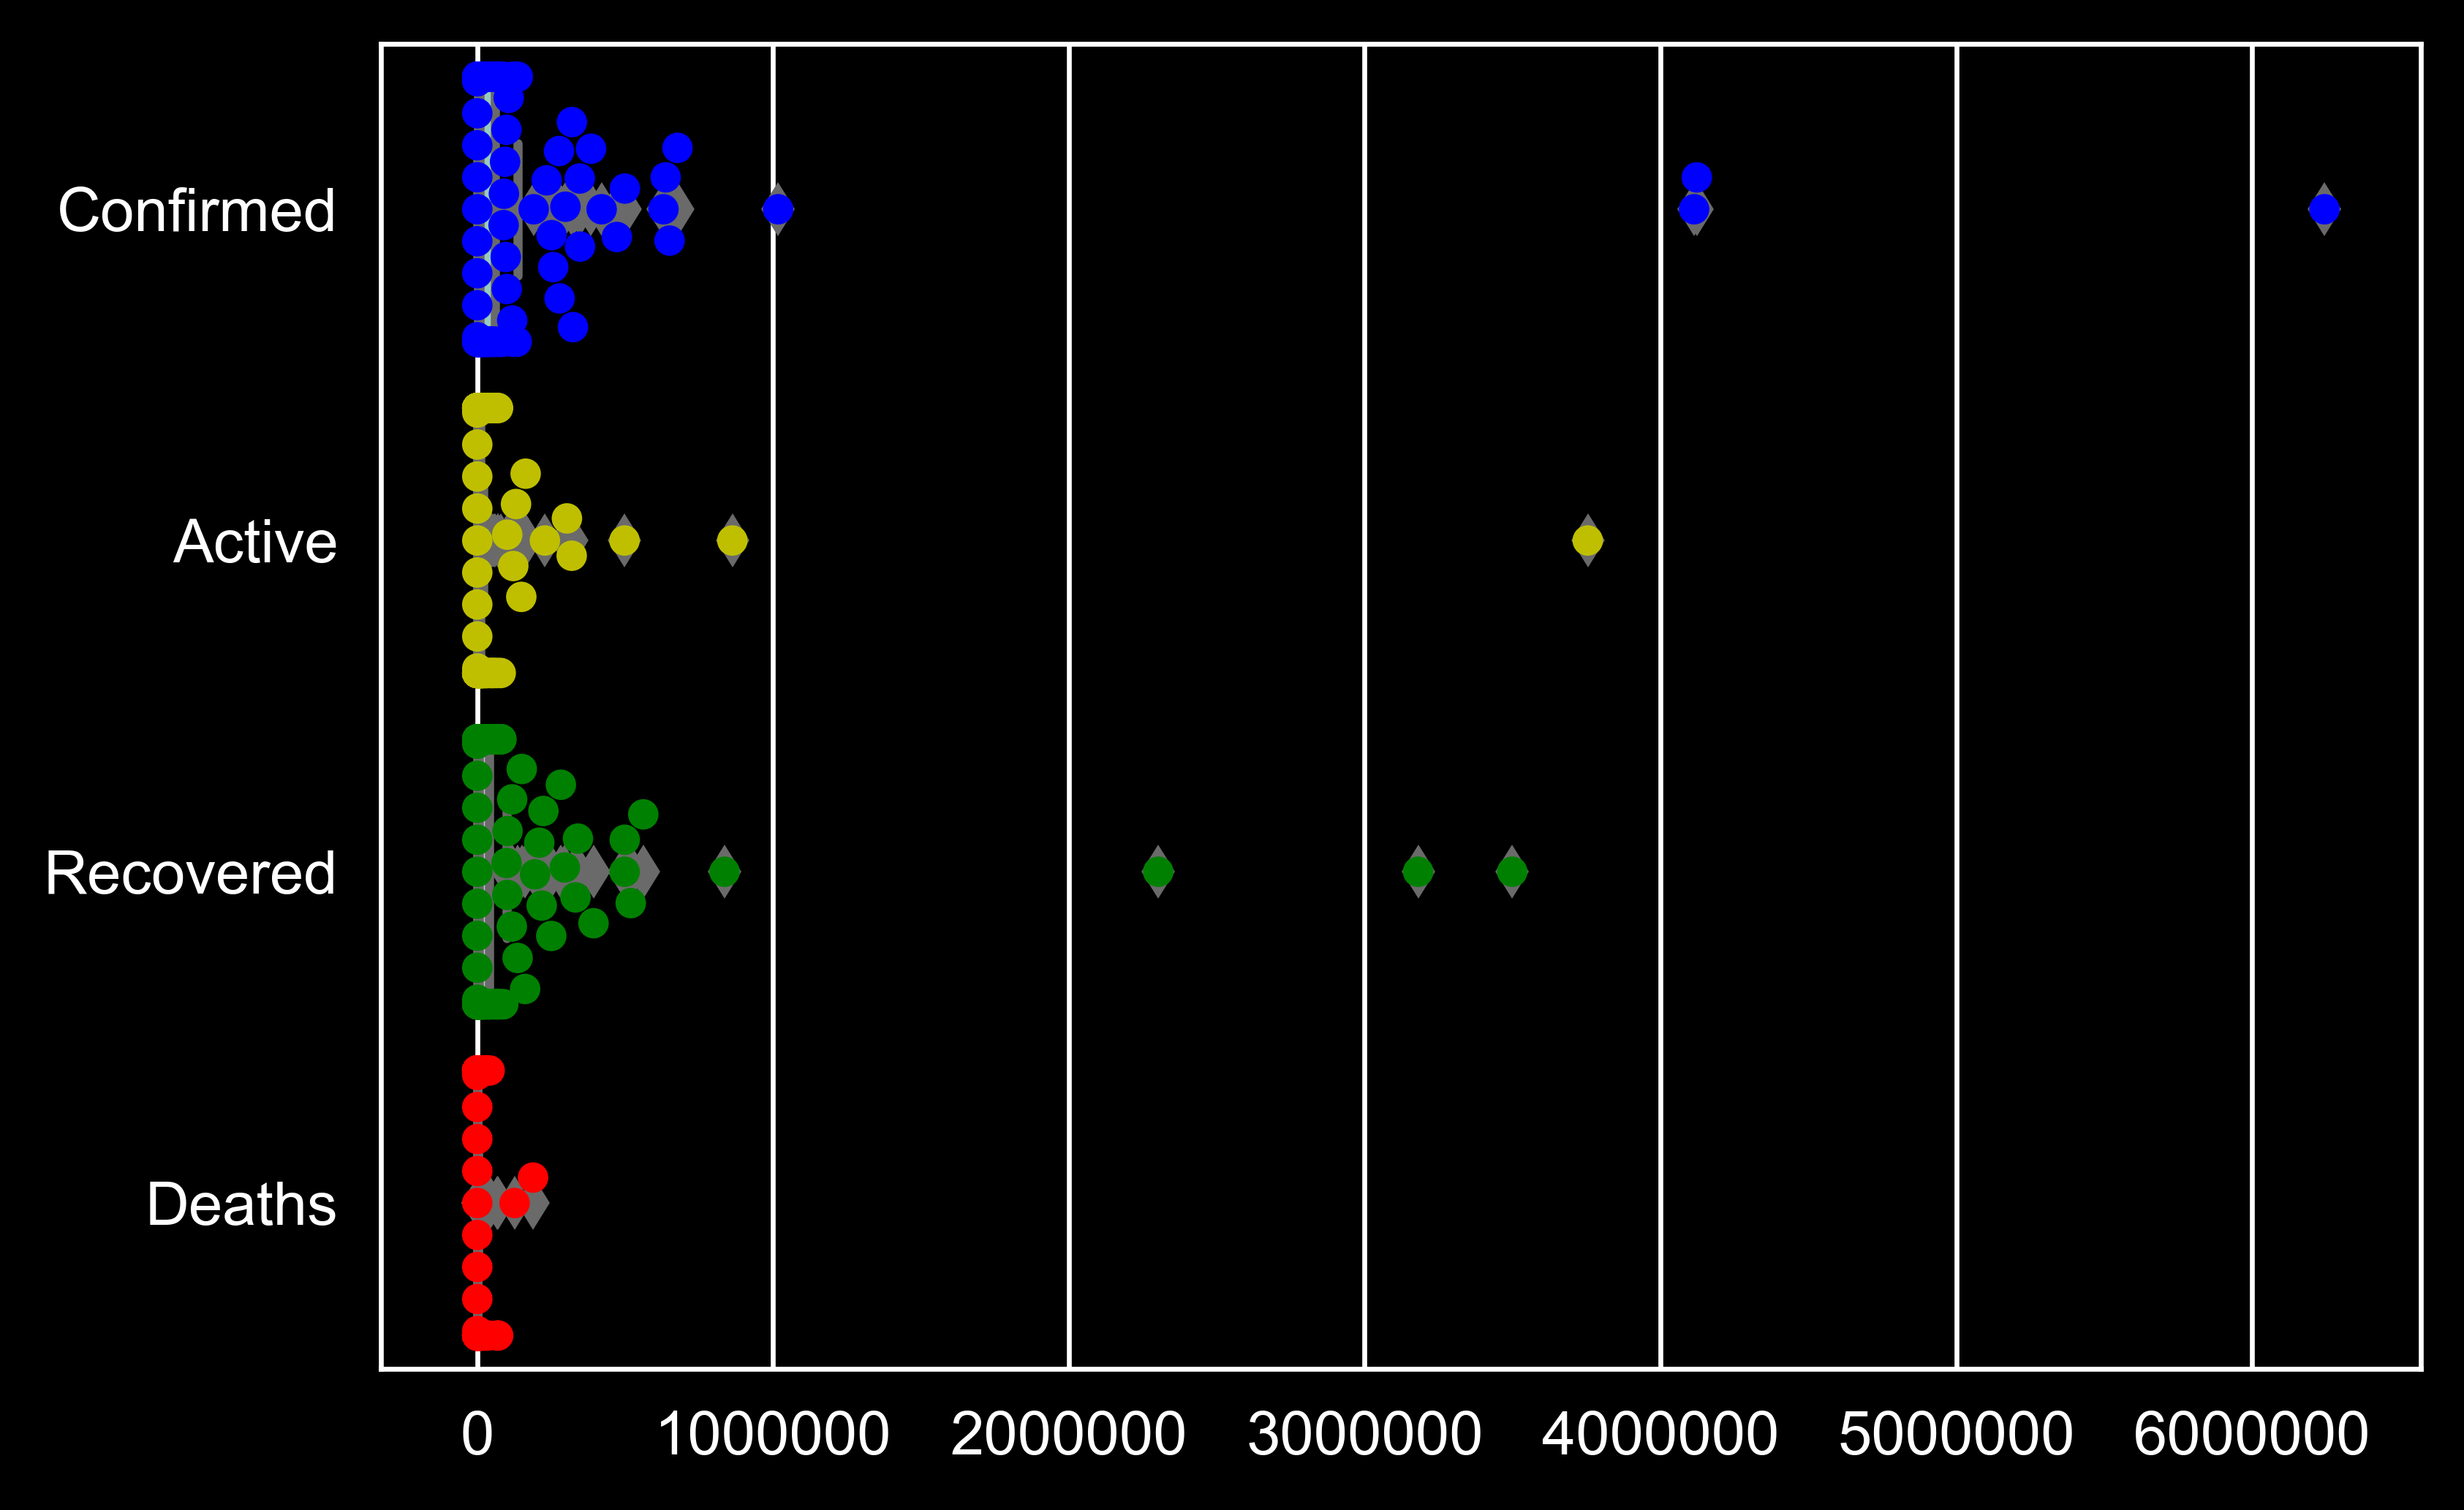

In [53]:
my_pal = {'Confirmed': "b",'Active': "y", 'Recovered': "g", 'Deaths':"r"}
ax = sns.boxplot(data=df_countries_grouped, orient="h")
ax = sns.swarmplot(data=df_countries_grouped, orient="h", palette=my_pal)

# Pair plot

In [54]:
sns.pairplot(df_countries_grouped[['Confirmed','Deaths','Recovered','Active']], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4);

# Area Plot<a id="6"></a>

visualize the top countries as a cumulative plot, also knows as a **Stacked Line Plot** 


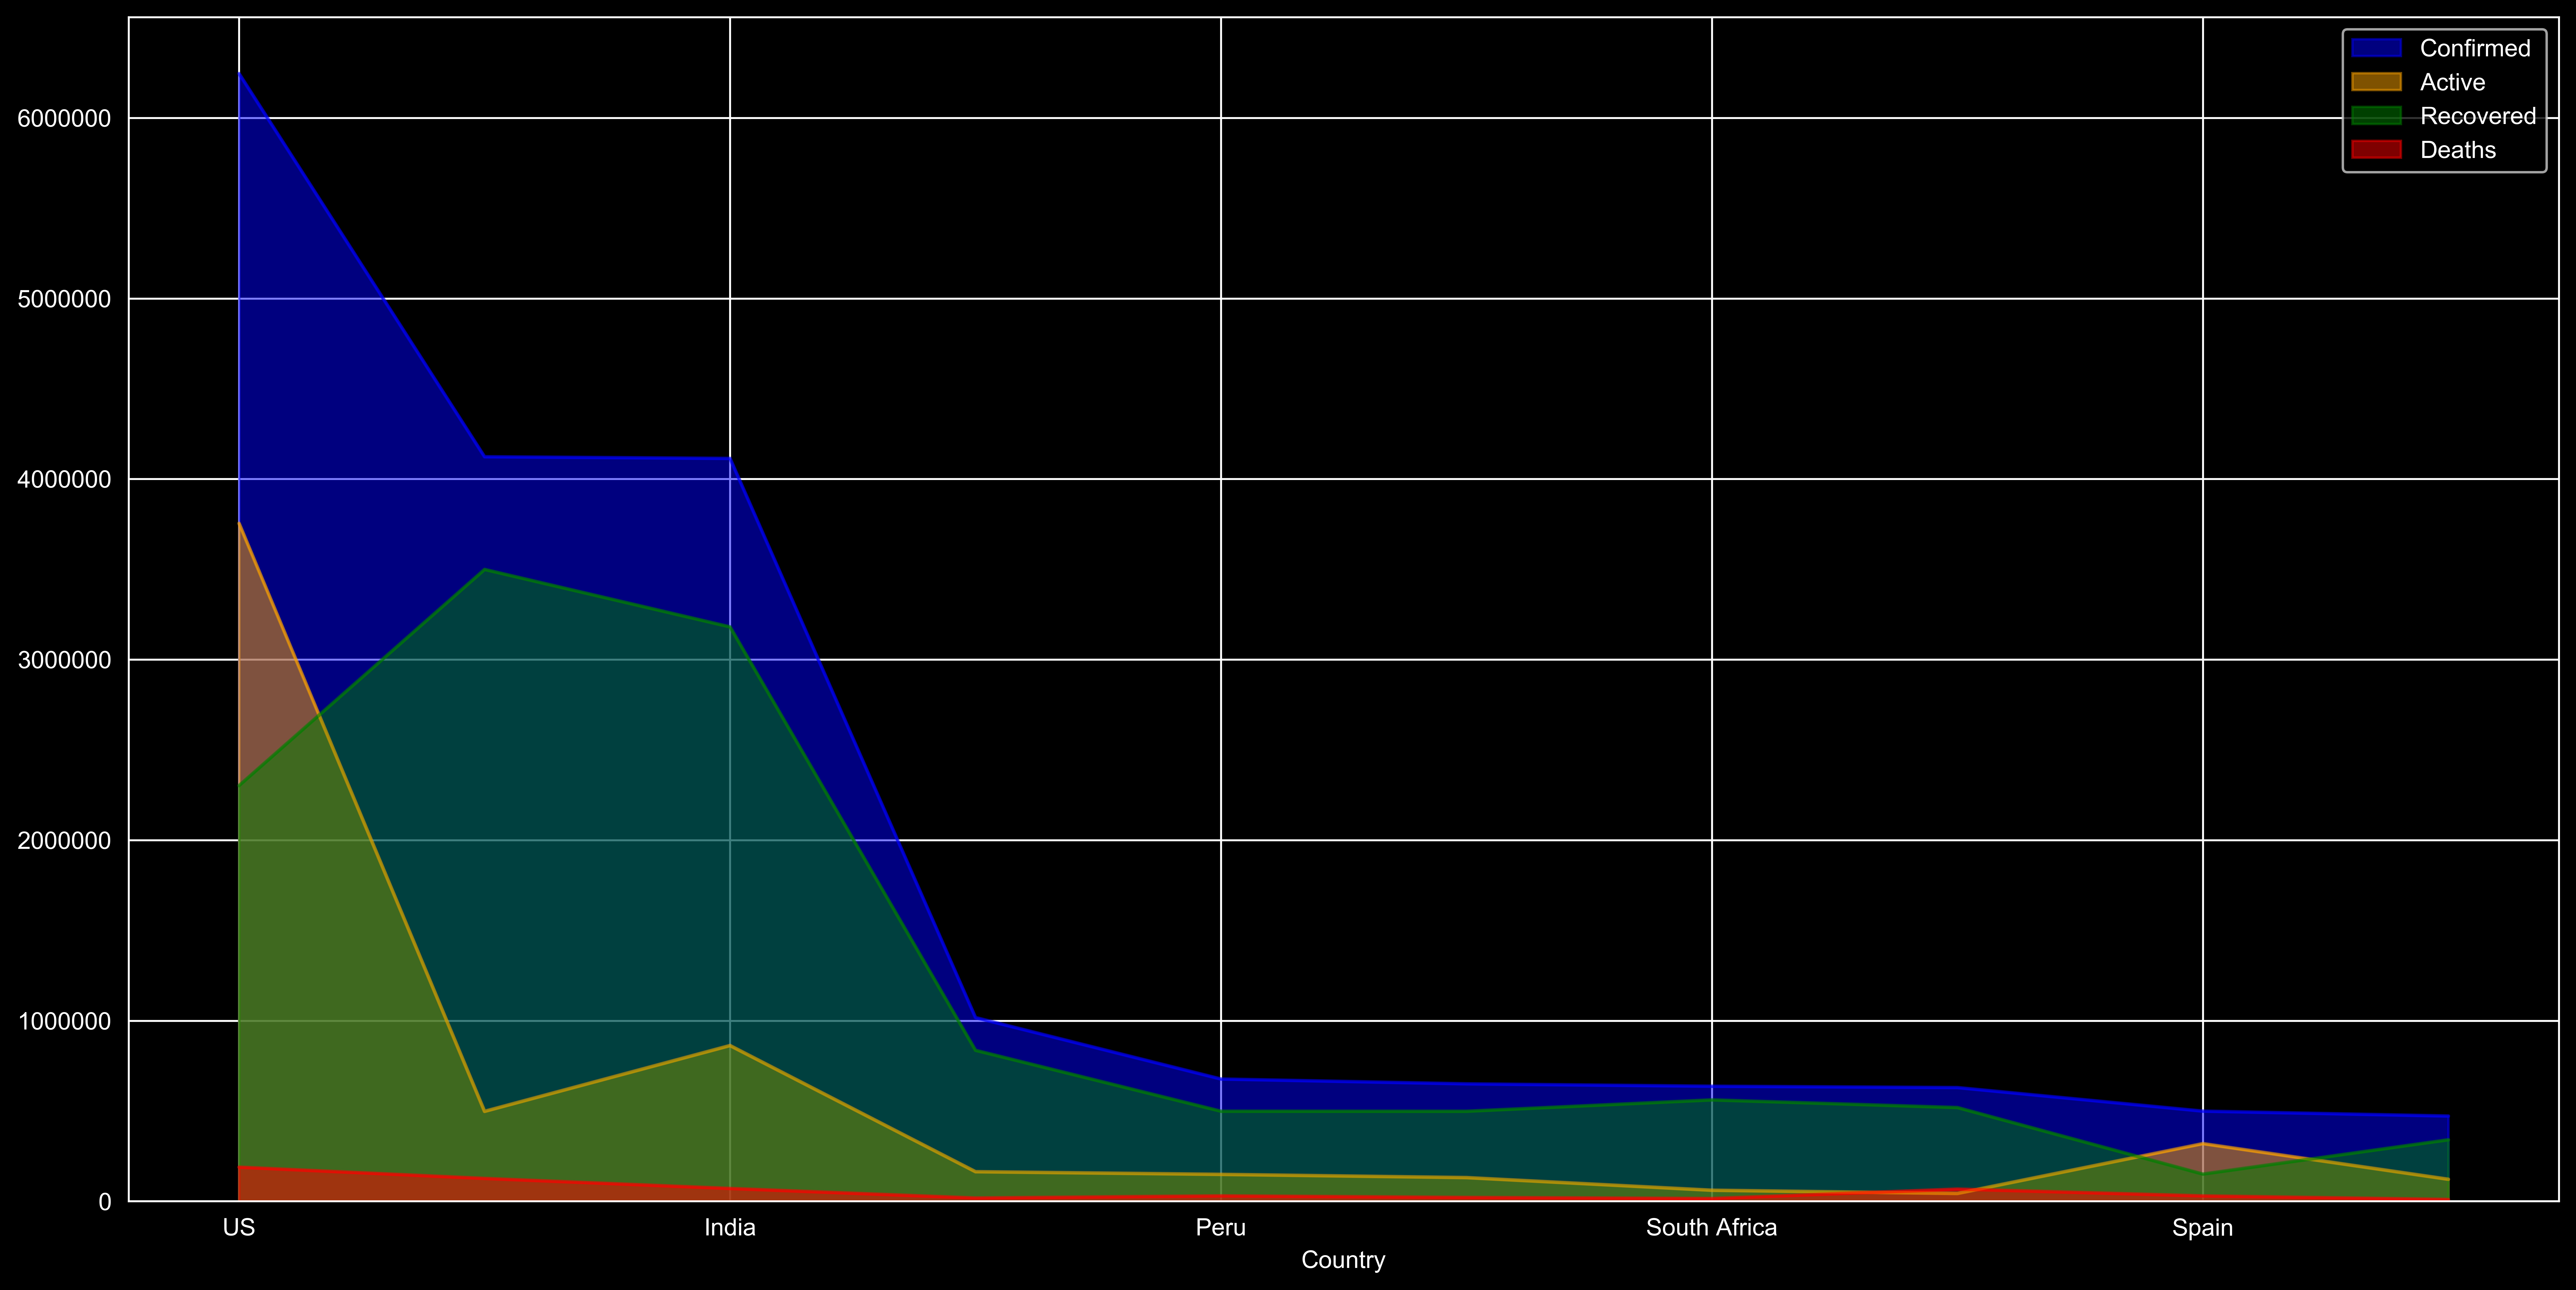

In [55]:
df_countries_top.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['blue', 'orange', 'green', 'red']) 
plt.show()

In [56]:
df_countries_top = df_countries_top.reset_index()

# Box Plot <a id="8"></a>

way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.

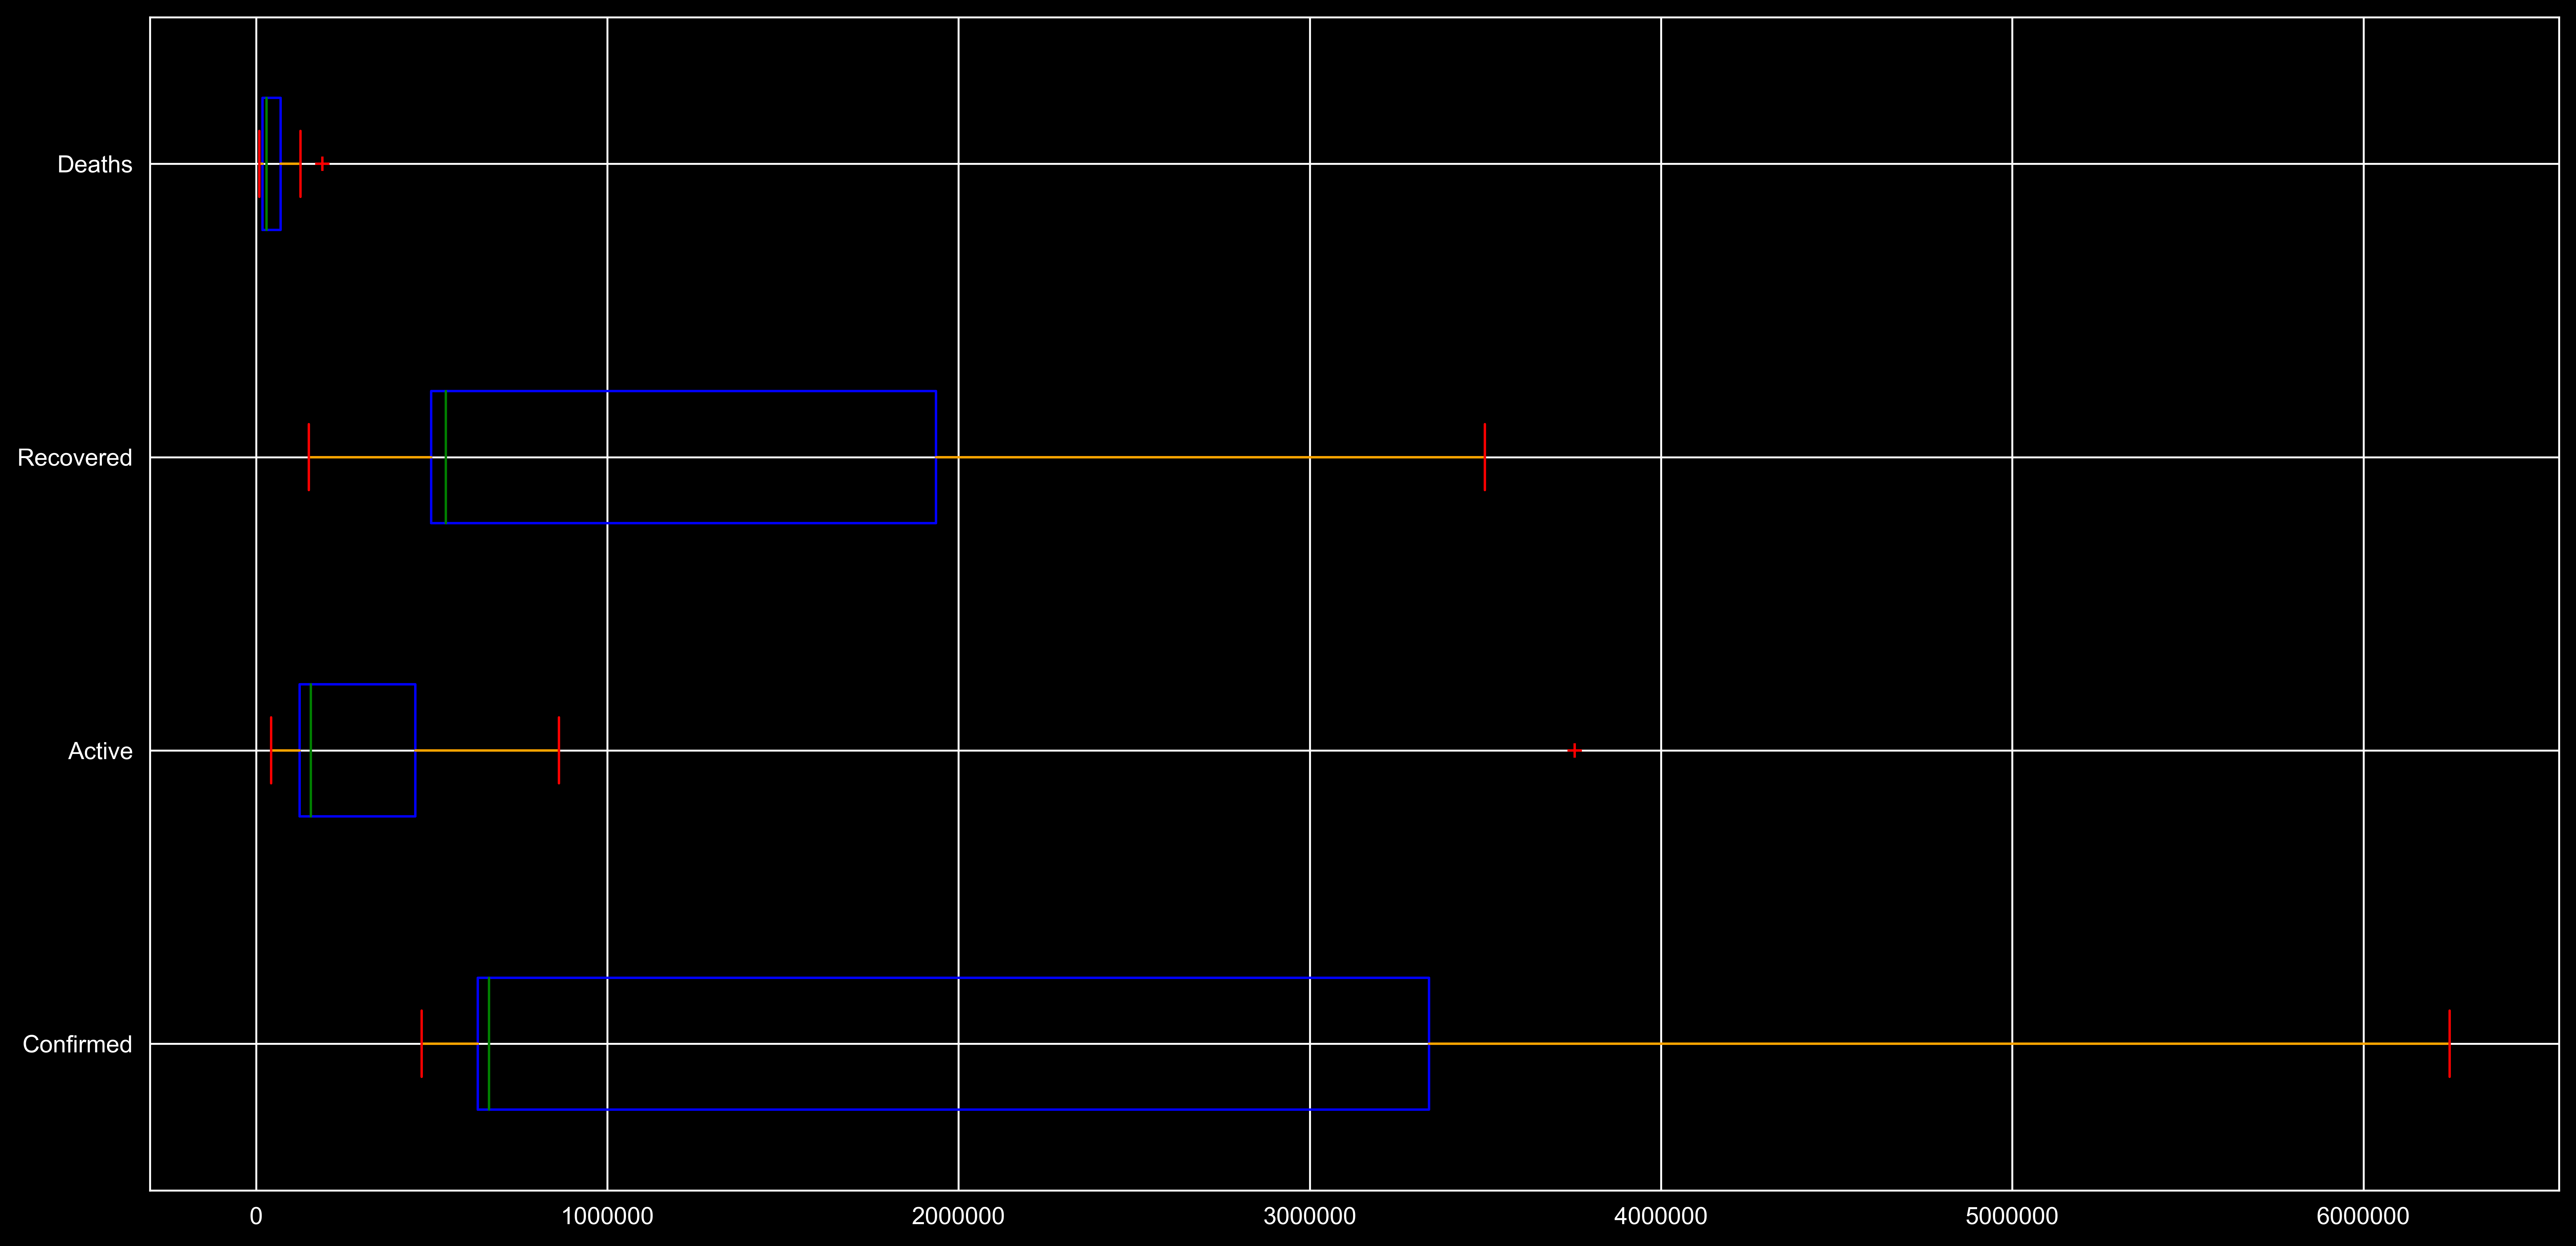

In [57]:
color = dict(boxes='Blue', whiskers='Orange',medians='Green', caps='Red')
df_countries_top.plot(kind ='box',notch= False,
          color=color, sym='r+', vert=False ,patch_artist=False,
          figsize=(18, 9))
plt.title('')
plt.show()

# Histogram<a id="8"></a>

histogram representing the *frequency* distribution of numeric dataset

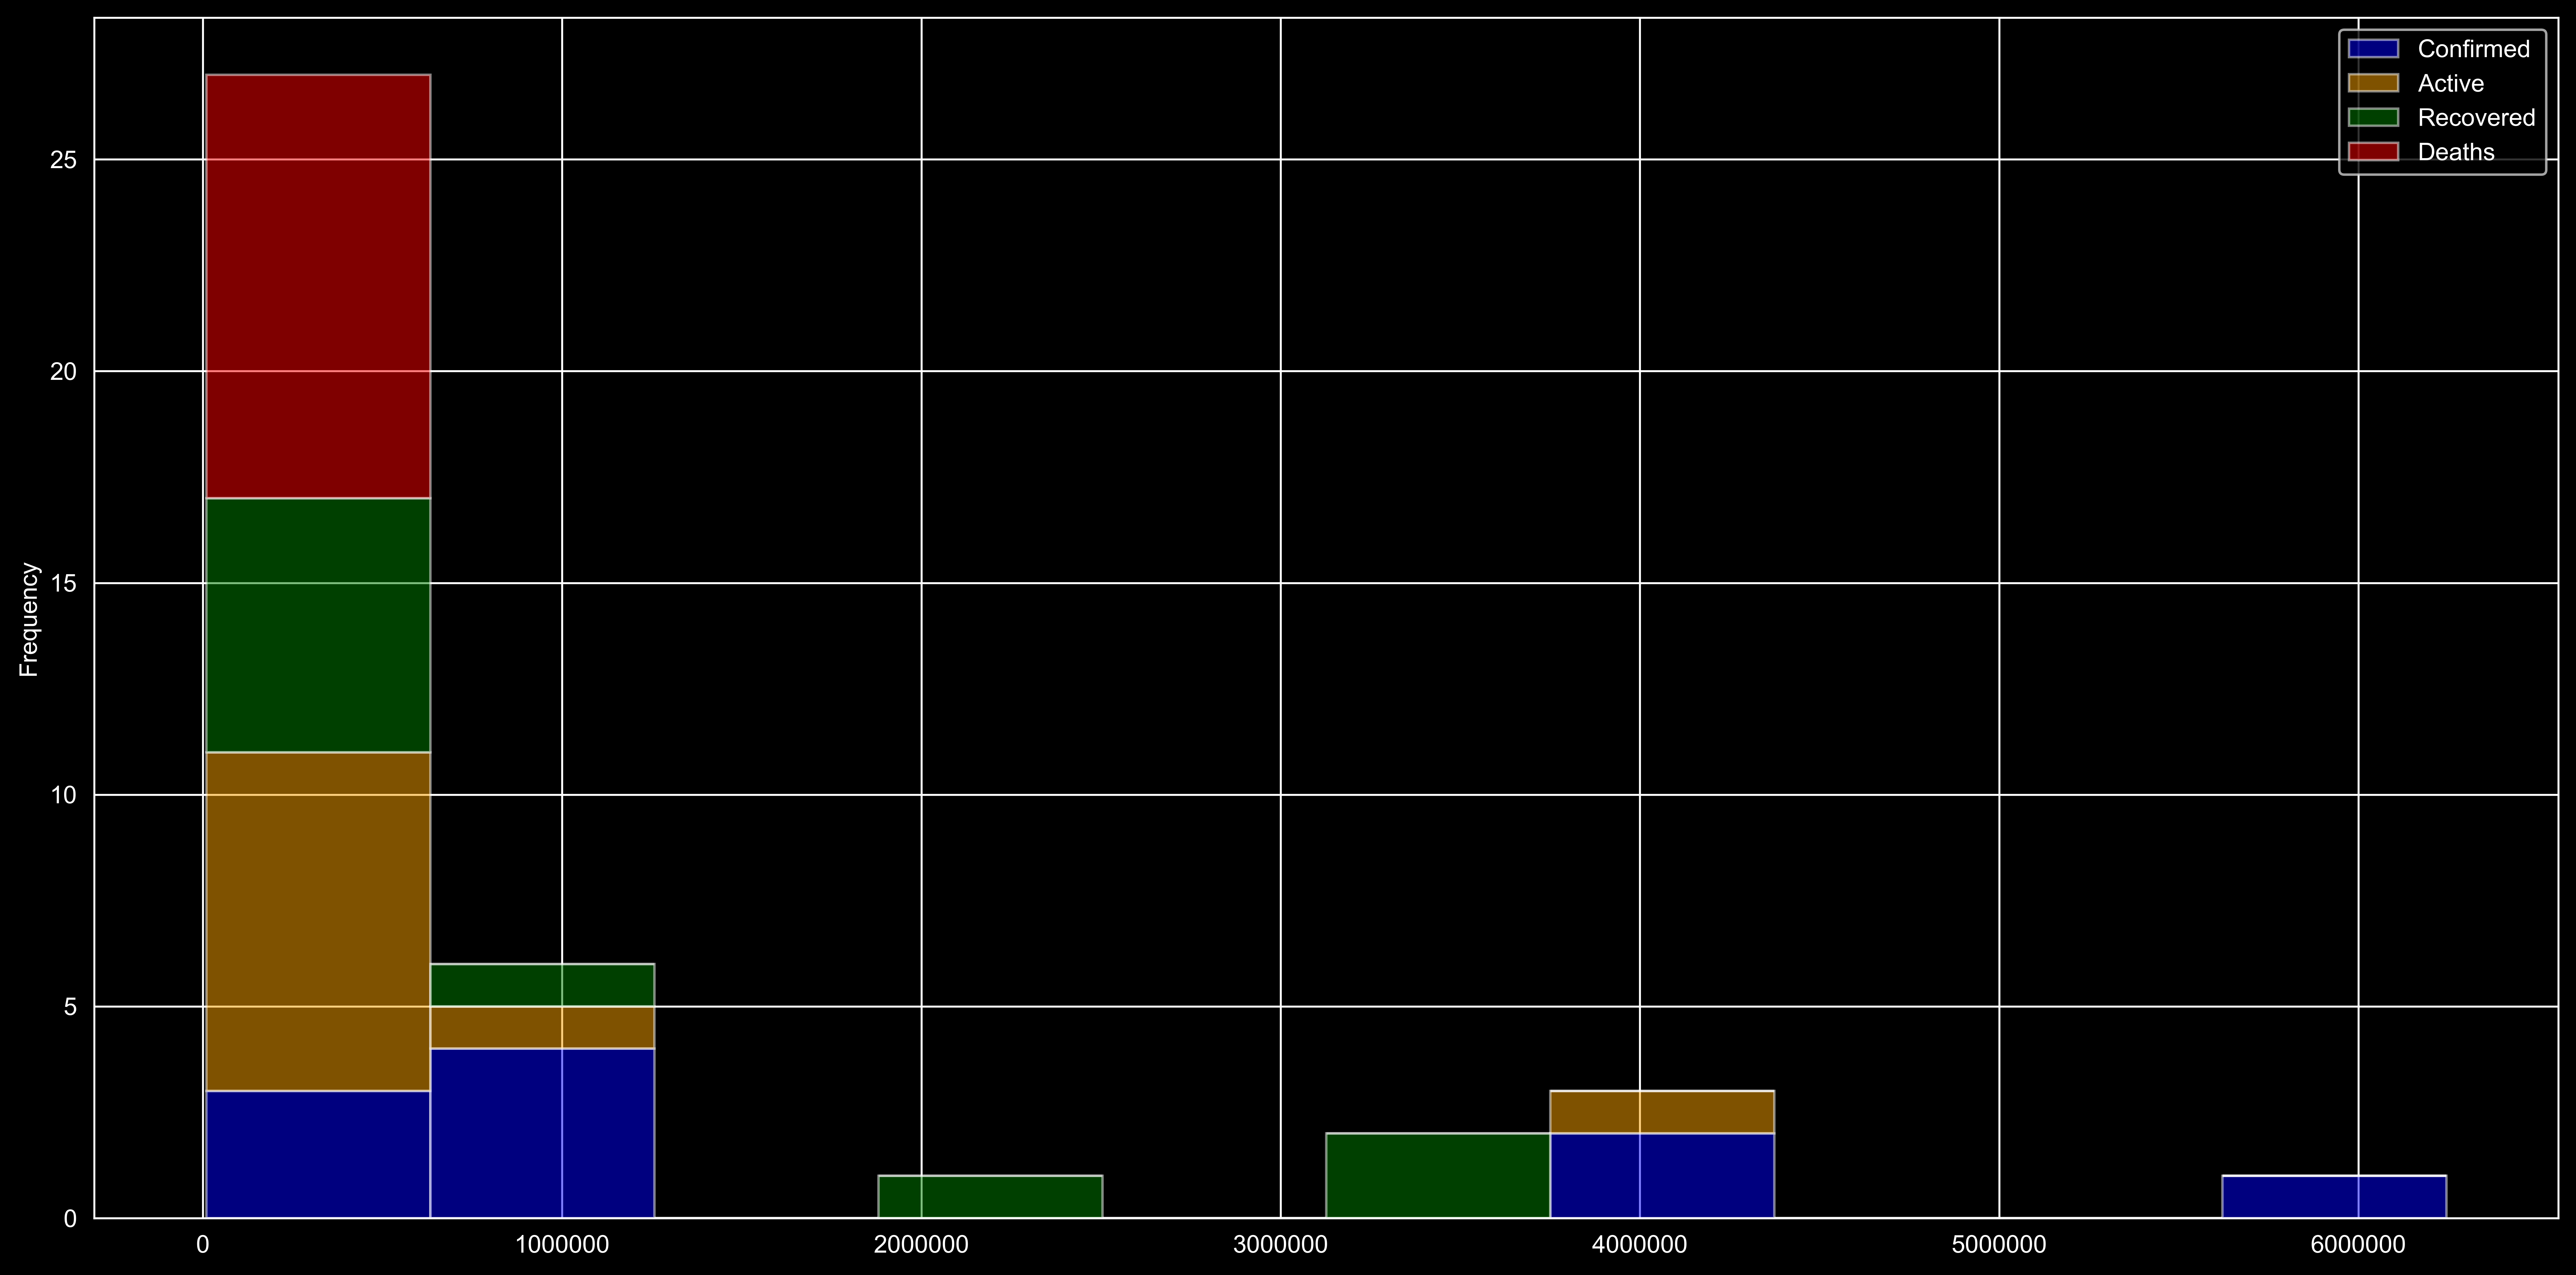

In [58]:
df_countries_top.plot(kind='hist', figsize=(18, 9),stacked=True, 
             alpha=0.5,
            color=['blue', 'orange', 'green', 'red']) 
plt.show()

# Multicollinearity top countries Pairplot 

linear relationships between independent variables


In [59]:
sns.pairplot(df_countries_top, 
             vars = ['Confirmed', 'Active', 'Recovered', 'Deaths'], 
             hue = 'Country', diag_kind = 'kde', palette="husl",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# heatmap top countries

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

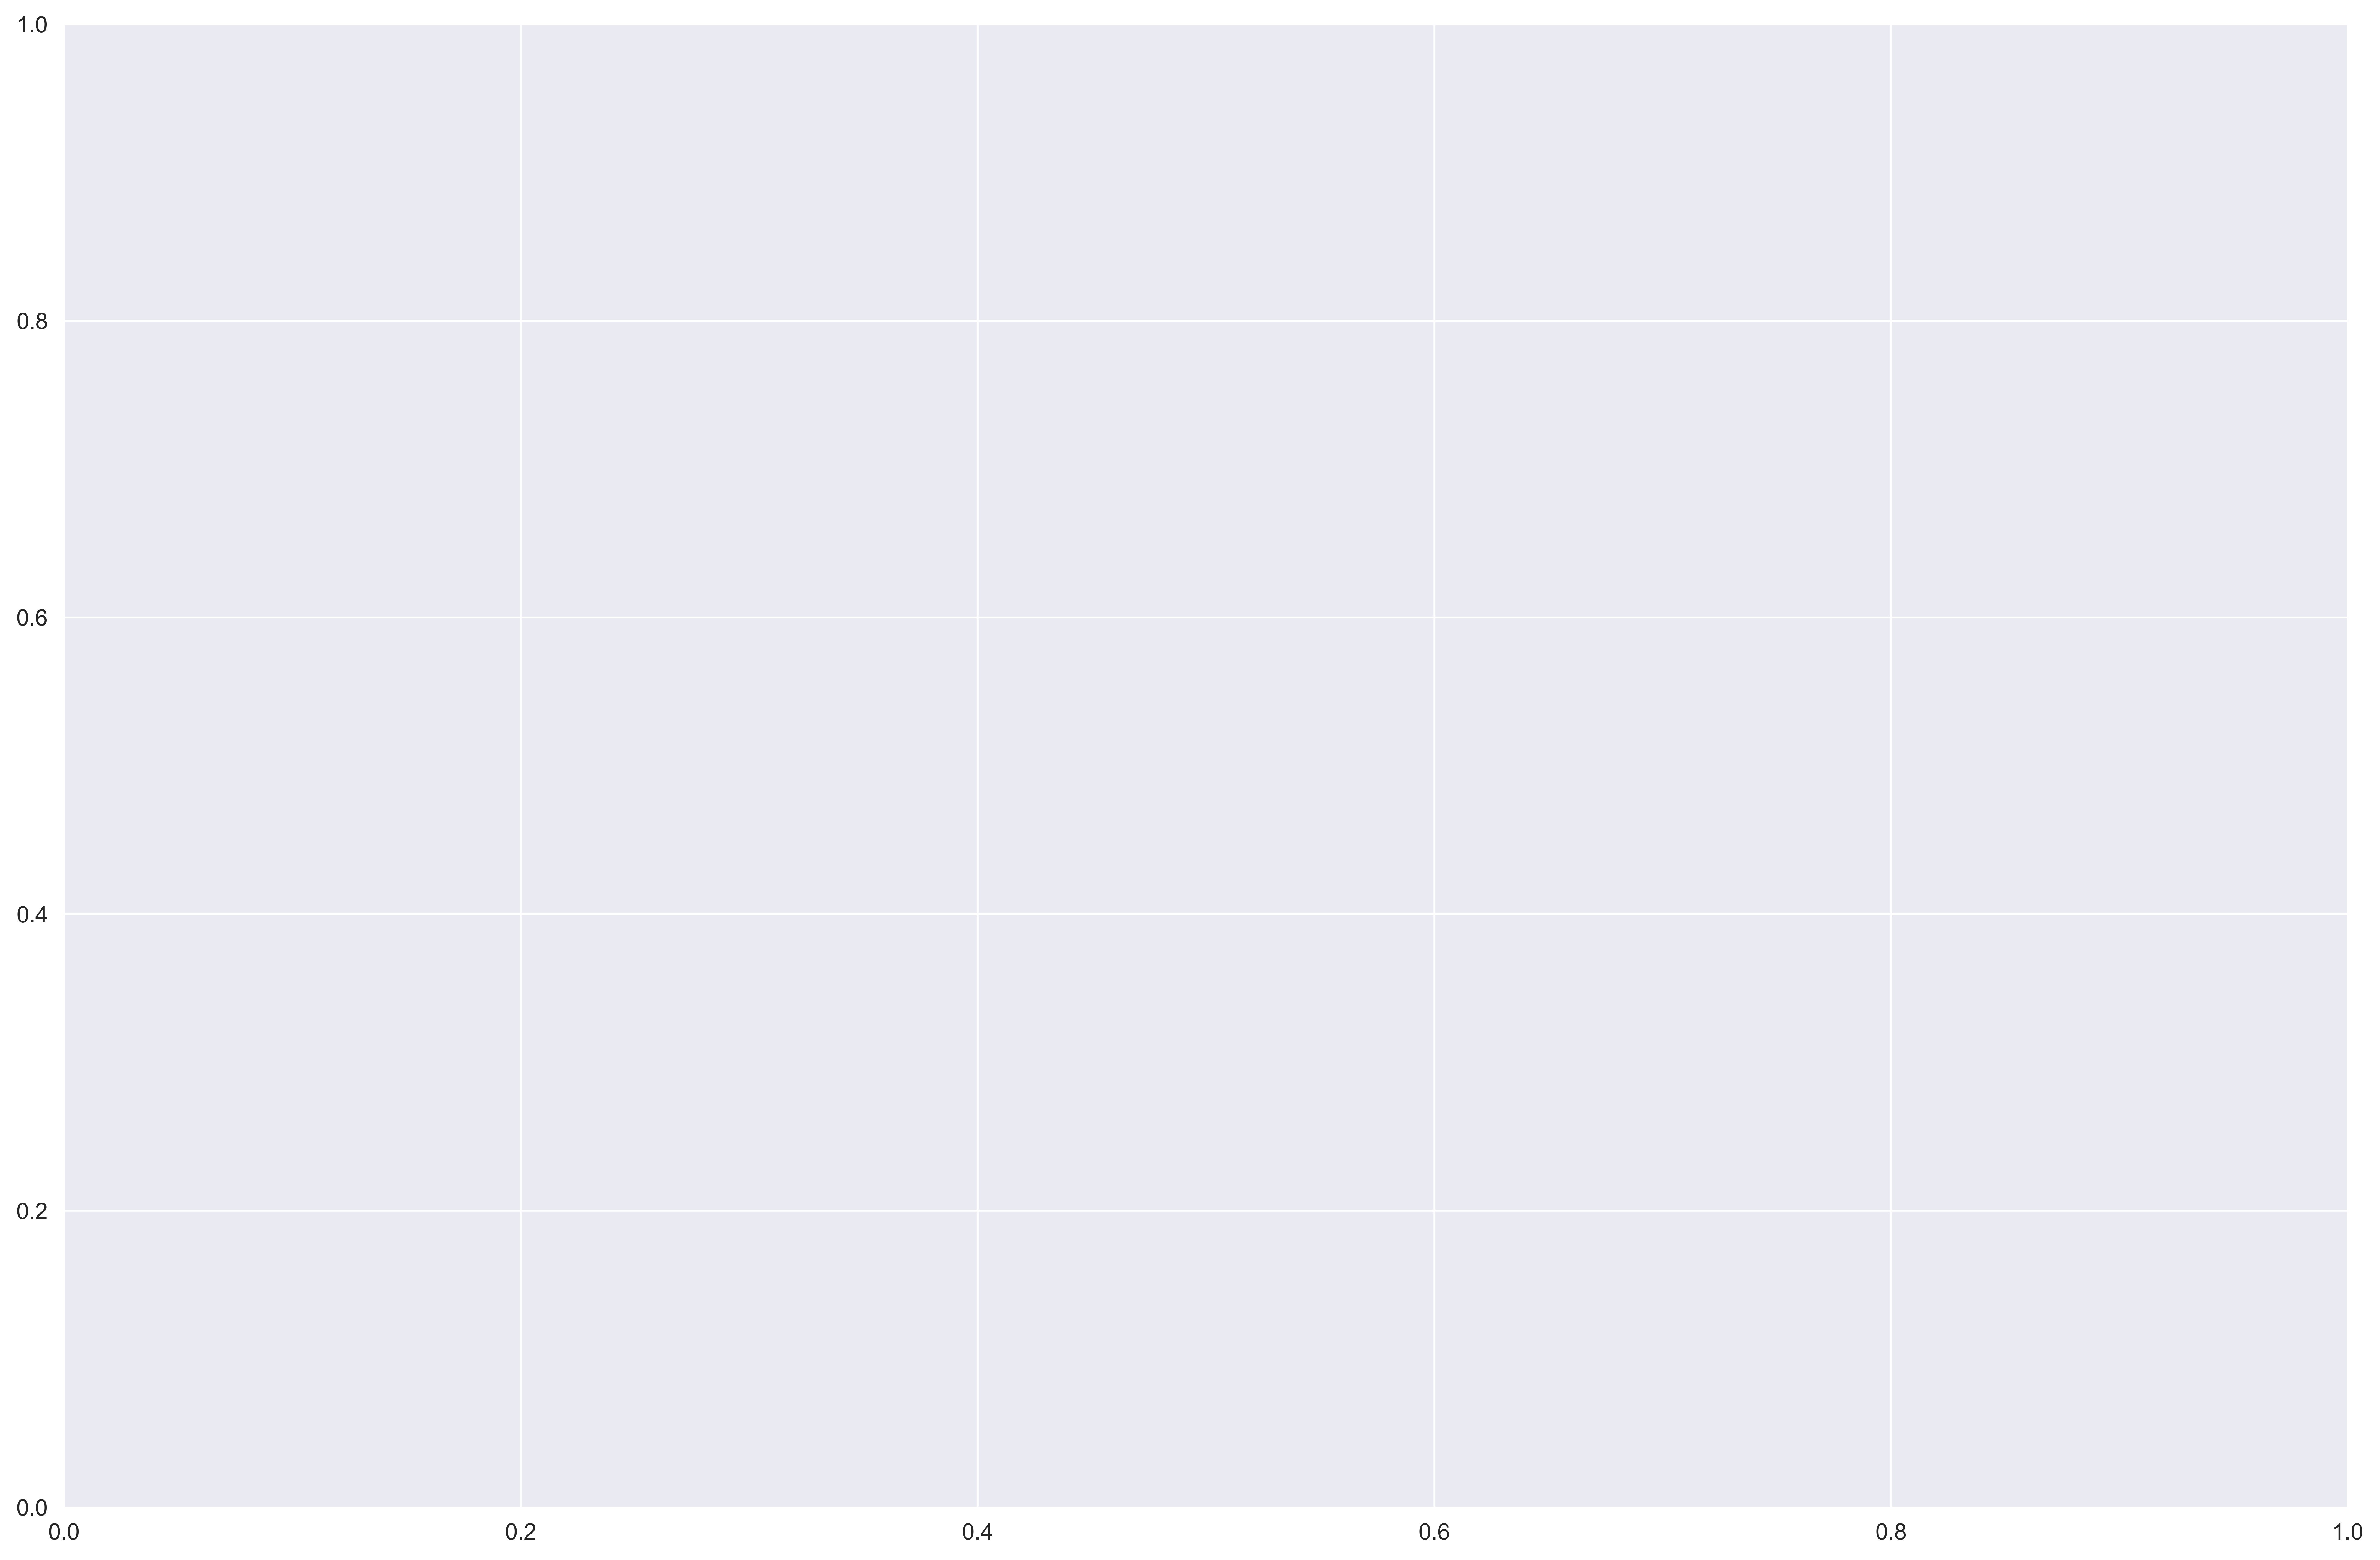

In [61]:
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries_top)

# heatmap Correlation 

In [ ]:
ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_countries.corr(), annot=True, linewidths=.5, cmap="Blues")